In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [4]:
team = make_array('Patriots','Patriots','Patriots','Patriots','Patriots','Patriots','Patriots','Patriots','Patriots','Patriots','Patriots','Colts','Colts','Colts','Colts')
blakeman = make_array(11.5,10.85,11.15,10.7,11.1,11.6,11.85,11.1,10.95,10.5,10.9,12.7,12.75,12.5,12.55)
prioleau = make_array(11.8,11.2,11.5,11,11.45,11.95,12.3,11.55,11.35,10.9,11.35,12.35,12.3,12.95,12.15)

pre_deflategate = Table().with_columns(
    'Team', team,
    'Blakeman', blakeman,
    'Prioleau', prioleau
)
pre_deflategate.to_csv('deflategate.csv')

# Deflategate

In [6]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [7]:
football = football.drop(1,2).with_column(
    'Combined', (football.column(1)+football.column(2))/2
)

In [9]:
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [10]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [12]:
start = np.append(12.5 * np.ones(11), 13 * np.ones(4))
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [13]:
drops = start - football.column(1)
drops

array([0.85 , 1.475, 1.175, 1.65 , 1.225, 0.725, 0.425, 1.175, 1.35 ,
       1.8  , 1.375, 0.475, 0.475, 0.275, 0.65 ])

In [14]:
football = football.select('Team').with_column(
    'Drop', drops
)

In [15]:
football.show()

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [16]:
means_tb1 = football.group('Team', np.average)

In [17]:
means_tb1

Team,Drop average
Colts,0.46875
Patriots,1.20227


In [19]:
means = means_tb1.column(1)
observed_difference = means.item(0) - means.item(1)

In [20]:
observed_difference

-0.733522727272728

In [21]:
group_labels = football.select('Team')
drop_tb1 = football.select('Drop')

In [35]:
shuffled_drops = drop_tb1.sample(with_replacement = False).column(0)
shuffled_tb1 = group_labels.with_column('Shuffled Drop', shuffled_drops)
means = shuffled_tb1.group('Team', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference

-0.06022727272727302

In [36]:
differences = make_array()

for i in np.arange(20000):
    shuffled_drops = drop_tb1.sample(with_replacement = False).column(0)
    shuffled_tb1 = group_labels.with_column('Shuffled Drop', shuffled_drops)
    means = shuffled_tb1.group('Team', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)

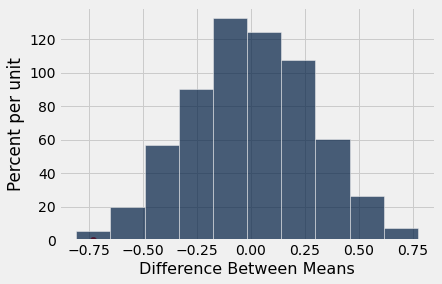

In [38]:
Table().with_column('Difference Between Means', differences).hist()
plots.scatter(observed_difference, 0, color='red', s=40)

In [39]:
np.count_nonzero(differences <= observed_difference) / 20000

0.003